In [1]:
import os

import tensorflow as tf
import PIL
import sewar.full_ref
from IPython.display import clear_output, display

import src.model
import src.utils
import src.vizualization

2022-12-21 10:52:58.053823: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-21 10:52:58.585697: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-21 10:53:00.766476: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/wojtek/anaconda3/lib/
2022-12-21 10:53:00.766705: W tensorflow/compiler/xla/stre

In [2]:
src.model.NSTImageTrainer.model_layers_names()

['input_1',
 'block1_conv1',
 'block1_conv2',
 'block1_pool',
 'block2_conv1',
 'block2_conv2',
 'block2_pool',
 'block3_conv1',
 'block3_conv2',
 'block3_conv3',
 'block3_conv4',
 'block3_pool',
 'block4_conv1',
 'block4_conv2',
 'block4_conv3',
 'block4_conv4',
 'block4_pool',
 'block5_conv1',
 'block5_conv2',
 'block5_conv3',
 'block5_conv4',
 'block5_pool']

In [3]:
BASE_RESULT_PATH = os.path.join("images", "results")
BASE_TRAINER_PATH = os.path.join("images", "trainers")

style_image_path = os.path.join("images", "styles", "demo_picasso_music.jpg")
content_image_path = os.path.join("images", "contents", "demo_pablo_picasso.jpg")

style_image = src.utils.tf_utils.load_img(style_image_path)
content_image = src.utils.tf_utils.load_img(content_image_path)

# perun, picasso
style_layers = ['block1_conv1', 'block2_conv1', 'block2_conv2', 'block3_conv1', 'block3_conv3', 'block4_conv2', 'block4_conv4', 'block5_conv1', 'block5_conv4']

# regularr
# style_layers = ['block1_conv1', 'block2_conv2', 'block3_conv1', 'block4_conv1', 'block5_conv1']


# beggining
# content_layers = ['block1_conv1']

# mid
# content_layers = ['block3_conv3']

# end
# content_layers = ['block5_conv4']

# custom
content_layers = ['block3_conv2']



In [4]:
type(content_image)

tensorflow.python.framework.ops.EagerTensor

In [45]:
trainer = src.model.NSTImageTrainer(
    style_image, 
    content_image, 
    style_layers,
    content_layers,
    content_weight=1e1,
    style_weight=1e1,
    noise=1
)
trainer.compile(tf.keras.optimizers.Adam(learning_rate=0.02, beta_1=0.99, epsilon=1e-1))

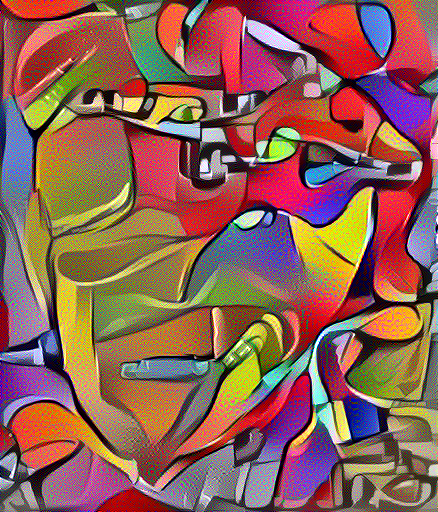

Epoch 46/150:


 78%|███████▊  | 39/50 [00:03<00:01, 10.42it/s]


KeyboardInterrupt: 

In [46]:
def display_output_image():
    display(trainer.output_image)
    
callbacks = [clear_output, display_output_image]
trainer.training_loop(steps_per_epoch=50, epochs=150, callbacks=callbacks)

In [ ]:
assert False

: 

In [ ]:
src.vizualization.save_vizualizations(
    trainer,
    style_image_path,
    content_image_path,
    BASE_RESULT_PATH,
    BASE_TRAINER_PATH
)

: 